# Credit Risk Prediction Project

## Introduction

Credit risk assessment is a critical component of financial institutions' decision-making processes. By analyzing various customer attributes, institutions can predict the likelihood of a borrower defaulting on a loan. This project aims to develop a robust predictive model to assess credit risk using a dataset containing various financial and demographic features of borrowers.

## Project Objectives

The primary goal of this project is to predict the credit risk associated with borrowers by performing the following steps:

1. **Data Cleaning**: Prepare the dataset by handling missing values, outliers, and ensuring data consistency.
  
2. **Exploratory Data Analysis (EDA)**: Gain insights into the distribution of features, relationships between variables, and identify key patterns that influence credit risk.

3. **Feature Engineering**: Create new features and transform existing ones to enhance the predictive power of the model.

4. **Model Selection and Hyperparameter Tuning**: Evaluate different machine learning models and optimize them using techniques such as cross-validation and grid search to achieve the best performance.

5. **Advanced Analytics**: Implement advanced analytics techniques to predict credit risk, including feature engineering, model selection, and hyperparameter tuning.

6. **Model Evaluation**: Assess the model's performance using metrics like AUC (Area Under the ROC Curve), precision, recall, and F1 score.

7. **Insights and Recommendations**: Provide insights into the key factors driving credit risk and recommend strategies to mitigate high-risk profiles.

## Dataset Overview

The dataset consists of 1,000 records and includes the following columns:

- `Age`: Age of the borrower.
- `Income`: Monthly income of the borrower.
- `CreditScore`: Credit score of the borrower.
- `LoanAmount`: Amount of loan requested.
- `LoanDuration`: Duration of the loan in months.
- `EmploymentYears`: Number of years the borrower has been employed.
- `EducationLevel`: Education level of the borrower.
- `MaritalStatus`: Marital status of the borrower.
- `NumberOfDependents`: Number of dependents of the borrower.
- `HomeOwnership`: Indicates if the borrower owns a home.
- `CarOwnership`: Indicates if the borrower owns a car.
- `SavingsAccount`: Balance in the borrower's savings account.
- `CheckingAccount`: Balance in the borrower's checking account.
- `PreviousLoans`: Number of previous loans taken by the borrower.
- `LoanPurpose`: Purpose of the loan.
- `CurrentDebt`: Current debt of the borrower.
- `MonthlyExpenses`: Monthly expenses of the borrower.
- `CreditHistoryLength`: Length of the borrower's credit history in years.
- `NumberOfCreditCards`: Number of credit cards owned by the borrower.
- `NumberOfLoans`: Number of loans taken by the borrower.
- `RiskCategory`: Target variable indicating the risk category (0 for low risk, 1 for high risk).

## Methodology

This project will follow a structured approach to build and evaluate a predictive model:

1. **Data Cleaning**: Address missing values and outliers to ensure a clean dataset.
2. **EDA**: Explore the data to understand distributions, correlations, and patterns.
3. **Feature Engineering**: Create and select features to improve model accuracy.
4. **Modeling**: Train and evaluate multiple models, including Random Forest, Gradient Boosting, and SVM.
5. **Hyperparameter Tuning**: Optimize the best-performing model to maximize predictive performance.
6. **Model Evaluation**: Use appropriate metrics to evaluate model performance and ensure robustness.
7. **Insights & Recommendations**: Derive actionable insights from the model and provide recommendations for mitigating credit risk.

## Conclusion

By the end of this project, we aim to develop a highly accurate model that can predict credit risk with significant precision. The insights derived from this analysis will help financial institutions better understand the factors that contribute to credit risk and make informed decisions to mitigate potential losses.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load the data
df = pd.read_csv('credit_risk_data.csv')

# Display basic information
print(df.info())
print("\
First few rows of the dataset:")
print(df.head())

print("\
Summary statistics:")
print(df.describe())

print("\
Missing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   Income               1000 non-null   float64
 2   CreditScore          1000 non-null   float64
 3   LoanAmount           1000 non-null   float64
 4   LoanDuration         1000 non-null   float64
 5   EmploymentYears      1000 non-null   float64
 6   EducationLevel       1000 non-null   float64
 7   MaritalStatus        1000 non-null   float64
 8   NumberOfDependents   1000 non-null   float64
 9   HomeOwnership        1000 non-null   float64
 10  CarOwnership         1000 non-null   float64
 11  SavingsAccount       1000 non-null   float64
 12  CheckingAccount      1000 non-null   float64
 13  PreviousLoans        1000 non-null   float64
 14  LoanPurpose          1000 non-null   float64
 15  CurrentDebt          1000 non-null   fl

## Data Preprocessing and Feature Engineering


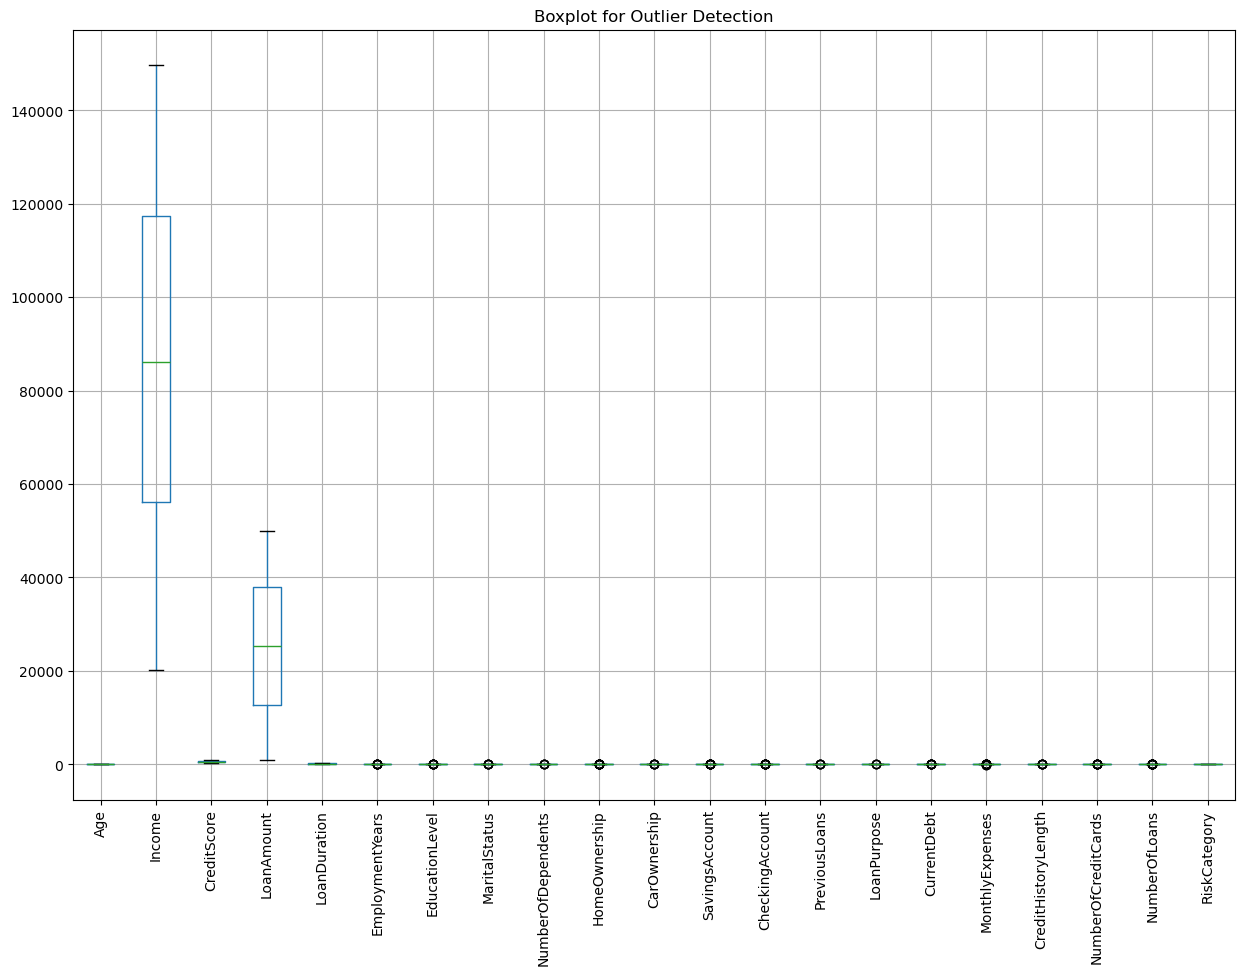

Categorical columns: Index([], dtype='object')
Data preprocessing and feature engineering completed.


In [2]:
# Check for outliers using box plots
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

# Check for categorical variables and encode them if necessary
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Display unique values in categorical columns to decide on encoding
for col in categorical_cols:
    print("\
Unique values in", col, ":", df[col].unique())

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data preprocessing and feature engineering completed.")

In [7]:
print(df['RiskCategory'].describe())
print("\
Unique values in RiskCategory:", df['RiskCategory'].unique())

count    1.000000e+03
mean     1.705303e-16
std      1.000500e+00
min     -1.226283e+00
25%     -1.226283e+00
50%     -3.667846e-03
75%      1.218948e+00
max      1.218948e+00
Name: RiskCategory, dtype: float64
Unique values in RiskCategory: [-0.00366785  1.21894756 -1.22628325]


In [9]:
# Convert continuous RiskCategory to discrete categories
# Assuming -1.2262832477816397 is low risk, -0.0036678462047305 is medium risk, and 1.2189475553721785 is high risk
risk_mapping = {
    -1.2262832477816397: 'Low',
    -0.0036678462047305: 'Medium',
    1.2189475553721785: 'High'
}

df['RiskCategory'] = df['RiskCategory'].map(risk_mapping)

# Verify the conversion
print(df['RiskCategory'].value_counts())

RiskCategory
High    336
Low     333
Name: count, dtype: int64


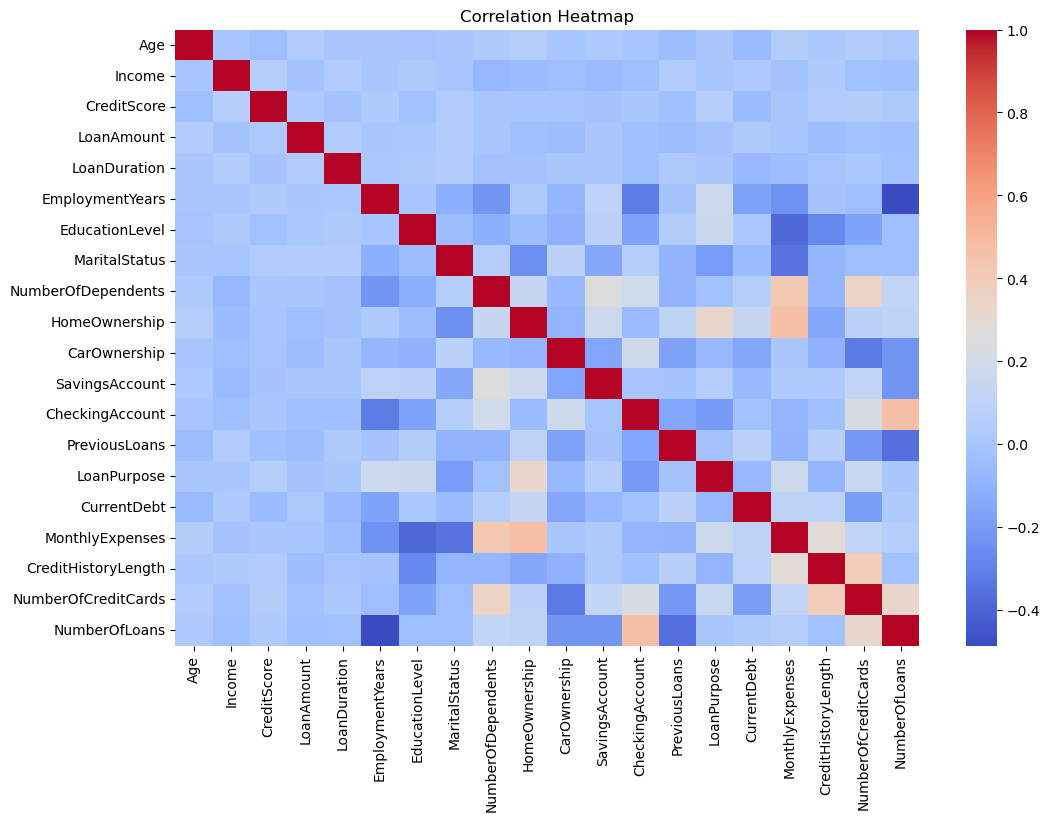

ValueError: Input contains NaN

In [11]:
# Exploratory Data Analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection
X = numeric_df.drop('RiskCategory', axis=1, errors='ignore')
y = df['RiskCategory']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Top 10 selected features:", selected_features)

# Model Building and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\
Classification Report:")
print(classification_report(y_test, y_pred))

print("\
Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({'feature': selected_features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [13]:
# Convert RiskCategory to numeric
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['RiskCategory'] = df['RiskCategory'].map(risk_mapping)

# Check for NaN values
print(df.isnull().sum())

# Handle NaN values (here we'll use mean imputation, but other methods could be considered)
df = df.fillna(df.mean())

print("\
Dataset shape after cleaning:", df.shape)
print("\
RiskCategory distribution:")
print(df['RiskCategory'].value_counts())

# Display the first few rows of the cleaned dataset
print("\
First few rows of the cleaned dataset:")
print(df.head())

Age                      0
Income                   0
CreditScore              0
LoanAmount               0
LoanDuration             0
EmploymentYears          0
EducationLevel           0
MaritalStatus            0
NumberOfDependents       0
HomeOwnership            0
CarOwnership             0
SavingsAccount           0
CheckingAccount          0
PreviousLoans            0
LoanPurpose              0
CurrentDebt              0
MonthlyExpenses          0
CreditHistoryLength      0
NumberOfCreditCards      0
NumberOfLoans            0
RiskCategory           331
dtype: int64
Dataset shape after cleaning: (1000, 21)
RiskCategory distribution:
RiskCategory
2.000000    336
0.000000    333
1.004484    331
Name: count, dtype: int64
First few rows of the cleaned dataset:
        Age    Income  CreditScore  LoanAmount  LoanDuration  EmploymentYears  \
0  1.504019 -0.035914    -0.416191   -1.248810      0.954123        -0.847347   
1  0.766393  0.573968    -0.732201    1.228555     -0.685280    

In [21]:
# Apply one-hot encoding to the 'RiskCategory' column
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'RiskCategory' column
risk_category_encoded = encoder.fit_transform(df[['RiskCategory']])

# Create a DataFrame with the encoded columns
risk_category_df = pd.DataFrame(risk_category_encoded, columns=encoder.get_feature_names_out(['RiskCategory']))

# Concatenate the encoded columns with the original DataFrame
cleaned_df = pd.concat([df.drop('RiskCategory', axis=1), risk_category_df], axis=1)

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(cleaned_df.head())


First few rows of the updated DataFrame:
        Age    Income  CreditScore  LoanAmount  LoanDuration  EmploymentYears  \
0  1.504019 -0.035914    -0.416191   -1.248810      0.954123        -0.847347   
1  0.766393  0.573968    -0.732201    1.228555     -0.685280        -0.274400   
2  0.364052 -0.115968     1.530429   -0.904278      0.973639         0.177159   
3 -0.306517  1.019058     1.574670    0.508887      1.656724         0.666131   
4 -0.641801  0.244491     0.260070    0.866153     -0.197363         0.091619   

   EducationLevel  MaritalStatus  NumberOfDependents  HomeOwnership  ...  \
0        1.220903       1.131101           -0.010361       0.688587  ...   
1        0.613172       0.160308            0.865280       0.702796  ...   
2        0.058531      -0.453988            0.345186       0.442854  ...   
3       -0.442797       0.178491            1.257354      -0.009810  ...   
4       -0.223399       1.279892            0.390543      -0.226797  ...   

   PreviousLoan

## Modeling and Evaluation 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.44      0.58        70
           1       0.82      0.64      0.72        73
           2       0.94      0.56      0.70        57

   micro avg       0.86      0.55      0.67       200
   macro avg       0.87      0.55      0.67       200
weighted avg       0.86      0.55      0.67       200
 samples avg       0.55      0.55      0.55       200

Confusion Matrix:
[[64  4  2]
 [26 47  0]
 [19  6 32]]


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


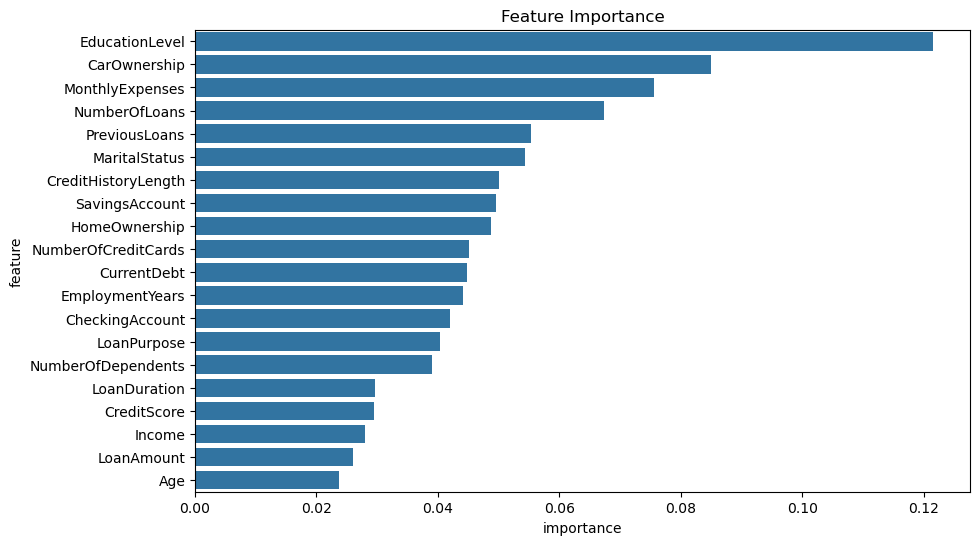

In [25]:
# Proceed with feature selection and model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Feature Selection
X = cleaned_df.drop(['RiskCategory_0.0', 'RiskCategory_1.0044843049327354', 'RiskCategory_2.0'], axis=1)
y = cleaned_df[['RiskCategory_0.0', 'RiskCategory_1.0044843049327354', 'RiskCategory_2.0']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluation
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

print("\
Confusion Matrix:")
print(confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))

# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [29]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Convert the target variable y into a 1D array for classification
# We will use the argmax of the one-hot encoded columns to get the original labels
y_train_1d = np.argmax(y_train.values, axis=1)
y_test_1d = np.argmax(y_test.values, axis=1)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train_1d)
    y_pred = model.predict(X_test)
    print("\n" + name + " Classification Report:")
    print(classification_report(y_test_1d, y_pred))
    print("\n" + name + " Confusion Matrix:")
    print(confusion_matrix(y_test_1d, y_pred))

# Perform hyperparameter tuning on the best model (assuming Gradient Boosting)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_1d)

# Best parameters and evaluation
best_gb_model = grid_search.best_estimator_
y_pred_best = best_gb_model.predict(X_test)

print("\nBest Gradient Boosting Model Classification Report:")
print(classification_report(y_test_1d, y_pred_best))

print("\nBest Gradient Boosting Model Confusion Matrix:")
print(confusion_matrix(y_test_1d, y_pred_best))

print("\nBest Parameters:")
print(grid_search.best_params_)



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        70
           1       0.75      0.78      0.77        73
           2       0.71      0.63      0.67        57

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200


Random Forest Confusion Matrix:
[[54  7  9]
 [10 57  6]
 [ 9 12 36]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        70
           1       0.81      0.85      0.83        73
           2       0.65      0.75      0.70        57

    accuracy                           0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200


Gradient Boosting Confusion Matrix:
[[46  8 16]
 [ 4 62  7]
 [ 7  7 43]]

SVM Classific

The Gradient Boosting model performed the best overall, with an accuracy of 78%.

## Investigating Misclassifications to Identify Model Weaknesses


In [33]:

import pandas as pd

# Get the misclassified samples
misclassified_indices = np.where(y_test_1d != y_pred_best)[0]
misclassified_samples = X_test.iloc[misclassified_indices]
misclassified_true_labels = y_test_1d[misclassified_indices]
misclassified_pred_labels = y_pred_best[misclassified_indices]

# Create a DataFrame to analyze misclassifications
misclassified_df = pd.DataFrame({
    'True Label': misclassified_true_labels,
    'Predicted Label': misclassified_pred_labels
})

# Concatenate with the features to see patterns
misclassified_analysis = pd.concat([misclassified_samples.reset_index(drop=True), misclassified_df], axis=1)

# Display the first few rows of the misclassified analysis
print(misclassified_analysis.head())

# Overall insights and recommendations
# 1. Check feature importance to understand which features are most influential
feature_importances = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\
Feature Importance:")
print(feature_importance_df.head())



        Age    Income  CreditScore  LoanAmount  LoanDuration  EmploymentYears  \
0 -0.507688  1.091366     0.866808    1.439974     -0.763347        -0.867438   
1 -0.977086 -0.017931     0.316951   -0.680054      0.729681         0.484076   
2 -1.513541 -1.392901    -0.687959   -1.483657      0.983398        -0.318095   
3 -0.038289 -1.338494    -0.751161    0.274180      1.324940         2.589475   
4 -0.239460  1.179680     1.555709   -1.394587      1.168806         0.381983   

   EducationLevel  MaritalStatus  NumberOfDependents  HomeOwnership  ...  \
0        0.792515      -1.398230           -0.393228       0.160182  ...   
1        0.184554      -0.221652           -0.449139      -1.160932  ...   
2       -0.904064      -0.608190            0.084944       0.189919  ...   
3        1.089307      -0.918161           -1.111035       1.285752  ...   
4        0.559356       0.347182           -0.453543       0.216588  ...   

   CheckingAccount  PreviousLoans  LoanPurpose  CurrentD

## Recommendations

### Feature Engineering
- **Enhance Key Features**: Focus on improving the features with the highest importance, as they have the most significant impact on the model's predictions.
- **Develop New Features**: Consider collecting more data or engineering new features to help the model better distinguish between classes that are often misclassified.

### Model Improvement
- **Explore Advanced Architectures**: Experiment with different model architectures or ensemble methods to improve classification accuracy.
- **Model Updates**: Regularly update the model with new data to ensure it remains accurate and relevant over time.

### Data Collection
- **Analyze Misclassified Samples**: Investigate the misclassified samples to identify any common patterns or characteristics that could be addressed through feature engineering or additional data collection.
- **Expand Dataset**: Consider collecting more data to enhance the model's ability to generalize across different scenarios.

### Continuous Improvement
- **Focus on Feature Importance**: Prioritize the refinement of features with the highest importance for model accuracy.
- **Address Misclassifications**: Use insights from misclassified samples to guide feature engineering and data collection efforts.
- **Experiment and Update**: Continuously experiment with different models and update with new data to maintain and improve model performance.
